# ImageDataGenerator

In [1]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [2]:
train='E:\Team Lead\conversation engine for deaf and dumb\Dataset\\training_set'
test='E:\Team Lead\conversation engine for deaf and dumb\Dataset\\test_set'

In [3]:
x_train = train_datagen.flow_from_directory(train, target_size=(64,64), batch_size=300,
                                            class_mode="categorical", color_mode = "grayscale")

Found 15750 images belonging to 9 classes.


In [4]:
x_test = test_datagen.flow_from_directory(test, target_size=(64,64), batch_size=300, class_mode="categorical", color_mode = "grayscale")

Found 2250 images belonging to 9 classes.


# Import Modules

In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten

# Initialize model

In [6]:
model = Sequential()

## Convolution Layer

In [7]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,1), activation='relu'))
#no. of feature detectors, size of feature detector, image size, activation function

# Add The Pooling Layer

In [8]:
model.add(MaxPooling2D(pool_size=(2,2)))

# Add The Flatten Layer

In [9]:
model.add(Flatten())

# Adding The Dense Layers

In [10]:
model.add(Dense(units=512, activation='relu')) #Adding_The_Dense_Layers

In [11]:
model.add(Dense(units=9,activation='softmax'))#Adding_The_Pooling_Layer

# Compile The Model

In [12]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
 dense (Dense)               (None, 512)               15745536  
                                                                 
 dense_1 (Dense)             (None, 9)                 4617      
                                                                 
Total params: 15,750,473
Trainable params: 15,750,473
Non-trainable params: 0
____________________________________________

# Fit And Save The Model

In [14]:
model.fit_generator(x_train,steps_per_epoch=24,epochs=10,validation_data=x_test,validation_steps=40 )

C:\Users\GarenaIT\AppData\Local\Temp\ipykernel_5536\690709108.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train,steps_per_epoch=24,epochs=10,validation_data=x_test,validation_steps=40 )


Epoch 1/10
24/24 [==============================] - 128s 5s/step - loss: 1.3308 - accuracy: 0.6389 - val_loss: 0.4798 - val_accuracy: 0.8889
Epoch 2/10
24/24 [==============================] - 57s 2s/step - loss: 0.3277 - accuracy: 0.9089
Epoch 3/10
24/24 [==============================] - 42s 2s/step - loss: 0.1636 - accuracy: 0.9600
Epoch 4/10
24/24 [==============================] - 33s 1s/step - loss: 0.1078 - accuracy: 0.9722
Epoch 5/10
24/24 [==============================] - 36s 2s/step - loss: 0.0662 - accuracy: 0.9822
Epoch 6/10
24/24 [==============================] - 33s 1s/step - loss: 0.0551 - accuracy: 0.9860
Epoch 7/10
24/24 [==============================] - 38s 2s/step - loss: 0.0444 - accuracy: 0.9892
Epoch 8/10
24/24 [==============================] - 34s 1s/step - loss: 0.0322 - accuracy: 0.9929
Epoch 9/10
24/24 [==============================] - 33s 1s/step - loss: 0.0233 - accuracy: 0.9954
Epoch 10/10
24/24 [==============================] - 35s 1s/step - loss: 0.

In [ ]:
model.save("IBM.h5")

## Import The Packages And Load The Saved Model

In [19]:
from keras.models import load_model
import cv2 , numpy as np

In [20]:
model=load_model(r'E:\Team Lead\conversation engine for deaf and dumb\Tensorflow\IBM.h5')

## Load The Test Image, Pre-Process It And Predict

In [32]:
from skimage.transform import resize
from tensorflow.keras.preprocessing import image
op=['A','B','C','D','E','F','G','H','I']
def detect(frame):
    img=resize(frame,(64,64,1))
    img=image.img_to_array(img)
    img=np.expand_dims(img, axis=0)
    if(np.max(img)>1):
        img=img/255.0
    prediction=model.predict(img)
    
    prediction=model.predict_classes(img)
    print("The Letter is "+ op[prediction[0]])

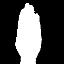

In [37]:
frame=cv2.imread(r"E:\Team Lead\conversation engine for deaf and dumb\Dataset\training_set\B\1.png")
image.load_img(r"E:\Team Lead\conversation engine for deaf and dumb\Dataset\training_set\B\1.png")

In [34]:
data=detect(frame)

1/1 [==============================] - 0s 39ms/step
The Letter is B
